In [2]:
from flask import Flask, request, render_template
import torch
import joblib
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
from tensorflow.keras.models import load_model

ModuleNotFoundError: No module named 'joblib'

In [16]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model,Sequential, load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import Input, Dense, Layer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import numpy as np
from memory_profiler import memory_usage
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from transformers import BertTokenizer, BertModel
import torch
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
import joblib
import gc
import os
from scipy.sparse import csr_matrix
import h5py
from tensorflow.keras.utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
def load_and_preprocess_data(file_path):
    
  data = pd.read_csv(file_path, sep=',')
  return data

In [148]:
df = load_and_preprocess_data('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\amostra\\amostra_completa_10000.csv')

In [149]:
df1 = load_and_preprocess_data('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\amostra\\amostra_completa_5000.csv')

In [4]:
df

,abertura_id,modelo,problema,tipo_equipamento,codigo_solicitado,cod_solic_desc,rn
0,7787011,59852,SINTOMA: FALHA ESTABILIZADOR\r\n\r\nHORARIO AT...,DESKTOP,11073142,ESTAB 500VA/500W EXS II 500B PR ENERMAX,1
1,10234175,60595,S: REINICIANDO \r\nRESPONSAVEL: THYAGO AMORIM ...,DESKTOP,11074729,FONTE ATX 300W FSP300-60EGA(P76001) FSP,1
2,9854033,67546,MOTIVO: EQUIPAMENTO NAO LIGA.,DESKTOP,11074729,FONTE ATX 300W FSP300-60EGA(P76001) FSP,2
3,9825095,67546,EM VISITA A SETOR FOI VERIFICADO QUE O COMPUTA...,DESKTOP,11074729,FONTE ATX 300W FSP300-60EGA(P76001) FSP,3
4,8743232,67546,"EQUIPAMENTO DESLIGANDO AP?S ALGUNS MINUTOS, NE...",DESKTOP,11074729,FONTE ATX 300W FSP300-60EGA(P76001) FSP,4
...,...,...,...,...,...,...,...
4824,10614225,58702,DEFEITO: PROBLEMA NO SSD\r\n\r\nN?CLEO REGIONA...,DESKTOP,11133341,SSD 256GB SATAIII CV8-CE256-V03 LITEO,26
4825,10608424,66284,S?RIE DO COMPUTADOR: 4A826FW0X\r\n- DEFEITO AP...,DESKTOP,11133341,SSD 256GB SATAIII CV8-CE256-V03 LITEO,27
4826,10550166,50920,CONTATO POR E-MAIL\r\n\r\nEQUIPAMENTO EST? APR...,DESKTOP,11133341,SSD 256GB SATAIII CV8-CE256-V03 LITEO,28
4827,10449761,78272,REALIZADO TESTE DE BANCADA E VERIFICADO PROBLE...,DESKTOP,11133341,SSD 256GB SATAIII CV8-CE256-V03 LITEO,29


In [ ]:
df = df.drop_duplicates(subset=['codigo_solicitado'], keep='last')
df

In [150]:
colunas_desejadas = ['abertura_id','codigo_solicitado','modelo', 'problema', 'tipo_equipamento']
df = df[colunas_desejadas]

In [151]:
df['codigo_solicitado'] = df['codigo_solicitado'].replace('NÃO DEFINIDO', np.nan)

# Remover as linhas onde 'codigo_solicitado' é NaN
df = df.dropna(subset=['codigo_solicitado'])

# Preenche ou remover valores nulos, conforme apropriado
df.fillna('', inplace=True)

# Remove linhas duplicadas
df.drop_duplicates(inplace=True)


In [7]:
# Defini a variável target e os features
X = df.drop(columns=['codigo_solicitado'])
y = df['codigo_solicitado']

# Aplica o oversampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

# Converte de volta para dataframe
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['codigo_solicitado'] = y_resampled



In [ ]:
df_resampled = df_resampled.drop_duplicates(subset=['codigo_solicitado'], keep='last')
df_resampled

In [8]:
df_resampled = df_resampled.drop(columns=['codigo_solicitado'])
df_resampled


,abertura_id,modelo,problema,tipo_equipamento
0,7787011,59852,SINTOMA: FALHA ESTABILIZADOR\r\n\r\nHORARIO AT...,DESKTOP
1,10234175,60595,S: REINICIANDO \r\nRESPONSAVEL: THYAGO AMORIM ...,DESKTOP
2,9854033,67546,MOTIVO: EQUIPAMENTO NAO LIGA.,DESKTOP
3,9825095,67546,EM VISITA A SETOR FOI VERIFICADO QUE O COMPUTA...,DESKTOP
4,8743232,67546,"EQUIPAMENTO DESLIGANDO AP?S ALGUNS MINUTOS, NE...",DESKTOP
...,...,...,...,...
164251,10761939,66284,"DEFEITO: TRAVANDO , NAO REPONDE\r\n\r\nQUADRA ...",DESKTOP
164252,11080761,66284,FIM DA GARANTIA: 08/06/2023\r\nN? S?RIE: 4A826...,DESKTOP
164253,11376922,70804,S: NÃO INICIALIZA (BIPANDO) / TECLADO FALHANDO...,DESKTOP
164254,10661048,69071,DEFEITO: COMPUTADOR NAO SE CONECTA NAO INTERNE...,DESKTOP


In [238]:
# Concatenar as colunas de falha e solução
df_resampled['descricao_solicitacao'] = df_resampled['tipo_equipamento']
# Concatenar as colunas de falha e defeitos
df_resampled['descricao_defeito'] = df_resampled['problema']


In [9]:
X_resampled = df_resampled

In [10]:
# Seleciona colunas numéricas e categóricas após o oversampling
numerical_features =['abertura_id','modelo']
#X_resampled.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['problema', 'tipo_equipamento']
#X_resampled.select_dtypes(include=['object']).columns.tolist()

# Remove a coluna 'cod_aplic' das colunas categóricas e numéricas, se estiver presente
if 'codigo_solicitado' in categorical_features:
    categorical_features.remove('codigo_solicitado')

# Converter colunas categóricas para strings
X_resampled[categorical_features] = X_resampled[categorical_features].astype(str)
X_resampled[numerical_features] = X_resampled[numerical_features].astype(float)




In [11]:
# Verifica se a GPU está disponível
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda')

In [12]:
# Carrega o tokenizer e o modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Função para extrair embeddings dos textos
def get_bert_embeddings(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding=True, max_length=128).to(device)
        # Desativa cálculo de gradiente para economizar memória
        with torch.no_grad():  
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.append(batch_embeddings)
        # Libera memória dos tensores intermediários
        del inputs, outputs  
        # Limpa cache da GPU
        torch.cuda.empty_cache()  
    return np.vstack(embeddings)

# Aplica a função nos campos textuais em batches
text_columns = [ 'problema','tipo_equipamento']
text_embeddings = []

for column in text_columns:
    embeddings = get_bert_embeddings(df_resampled[column].tolist(), batch_size=32)
    text_embeddings.append(embeddings)

# Concatenar os embeddings textuais em uma única matriz
all_text_embeddings = np.hstack(text_embeddings)



c:\Users\daniel.silva\AppData\Local\anaconda3\envs\tensor\lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [13]:

if X_resampled[numerical_features].shape[0] == all_text_embeddings.shape[0]:
    X_final = np.hstack([X_resampled[numerical_features] , all_text_embeddings])
else:
    raise ValueError("Dimensões incompatíveis entre X_normalized e text embeddings.")

# Exibir as primeiras linhas do dataset final (convertido para um DataFrame denso para exibição)
print(pd.DataFrame(X_final).head())

         0        1         2         3         4         5         6     \
0   7787011.0  59852.0 -0.434043 -0.128523 -0.080875  0.075487 -0.313106   
1  10234175.0  60595.0 -0.364637  0.238442  0.310628 -0.007814 -0.005606   
2   9854033.0  67546.0 -0.705506  0.151037 -0.075066 -0.240621 -0.101037   
3   9825095.0  67546.0 -0.409433  0.360150  0.515823  0.222343  0.334897   
4   8743232.0  67546.0 -0.647501  0.093474 -0.191266  0.197877  0.277602   

       7         8         9     ...      1528      1529      1530      1531  \
0 -0.167453  0.036150 -0.022040  ...  0.693512 -0.038778  0.397668  0.429285   
1 -0.149041  0.199166  0.287044  ...  0.693512 -0.038778  0.397668  0.429285   
2 -0.521336  0.165842  0.520402  ...  0.693512 -0.038778  0.397668  0.429285   
3 -0.371513  0.406041  0.301816  ...  0.693512 -0.038778  0.397668  0.429285   
4 -0.119848  0.613856  0.295715  ...  0.693512 -0.038778  0.397668  0.429285   

       1532      1533      1534      1535      1536      1537 

In [14]:
# Criar transformadores
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Aplicar transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [15]:
scaler = StandardScaler()
X_final = scaler.fit_transform(X_final)
# Remapear os rótulos para garantir que estão no intervalo correto
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

In [17]:
# Divisão dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_final, y_resampled, test_size=0.2, random_state=42)


In [18]:
num_classes = len(np.unique(y_resampled))

# Definição do modelo ajustado
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks para monitorar o treinamento
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [20]:
# Treinamento do modelo usando os geradores
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[early_stopping, reduce_lr])

# Avaliação do modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

Epoch 1/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.4523 - loss: 2.6290 - val_accuracy: 0.7466 - val_loss: 1.1745 - learning_rate: 0.0010
Epoch 2/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6687 - loss: 1.4458 - val_accuracy: 0.7905 - val_loss: 1.0470 - learning_rate: 0.0010
Epoch 3/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6962 - loss: 1.3288 - val_accuracy: 0.7964 - val_loss: 0.9987 - learning_rate: 0.0010
Epoch 4/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7131 - loss: 1.2703 - val_accuracy: 0.8039 - val_loss: 0.9460 - learning_rate: 0.0010
Epoch 5/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7155 - loss: 1.2458 - val_accuracy: 0.8160 - val_loss: 0.9203 - learning_rate: 0.0010
Epoch 6/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7188 - loss: 1.2240 - val_accuracy: 0.8053 - val_loss: 0.9083 - learning_rate: 0.0010
Epoch 7/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7

In [21]:
# Salvando o modelo treinado
model.save('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\model15.h5')

# Salvando o scaler e o encoder
joblib.dump(scaler, 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\scaler15.pkl')
joblib.dump(label_encoder, 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder15.pkl')

['C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder15.pkl']

In [83]:
# Definição do modelo
num_classes = len(np.unique(y_resampled))

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation='softmax'))


# Compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)


# Salvando o modelo treinado
model.save('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\model11.h5')

# Salvando o scaler e o encoder
joblib.dump(scaler, 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\scaler11.pkl')
joblib.dump(label_encoder, 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder11.pkl')

Epoch 1/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4547 - loss: 3.0019 - val_accuracy: 0.7321 - val_loss: 1.4588
Epoch 2/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6513 - loss: 1.7283 - val_accuracy: 0.7573 - val_loss: 1.3818
Epoch 3/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6745 - loss: 1.6430 - val_accuracy: 0.7661 - val_loss: 1.3668
Epoch 4/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6831 - loss: 1.6117 - val_accuracy: 0.7508 - val_loss: 1.3555
Epoch 5/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6913 - loss: 1.5810 - val_accuracy: 0.7815 - val_loss: 1.2742
Epoch 6/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6907 - loss: 1.5727 - val_accuracy: 0.7880 - val_loss: 1.2690
Epoch 7/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6963 - loss: 1.5422 - val_accuracy: 0.7686 - val_loss: 1.2919
Epoch 8/20
4107/4107 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6974 - loss: 1

['C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder11.pkl']

In [22]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

1027/1027 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8859 - loss: 0.4675
Validation Loss: 0.46643292903900146
Validation Accuracy: 0.8859429955482483


In [ ]:
 # Libera a memória
#del all_text_embeddings
#gc.collect()

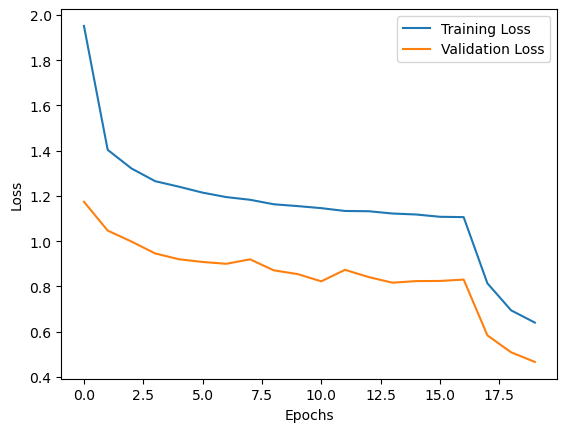

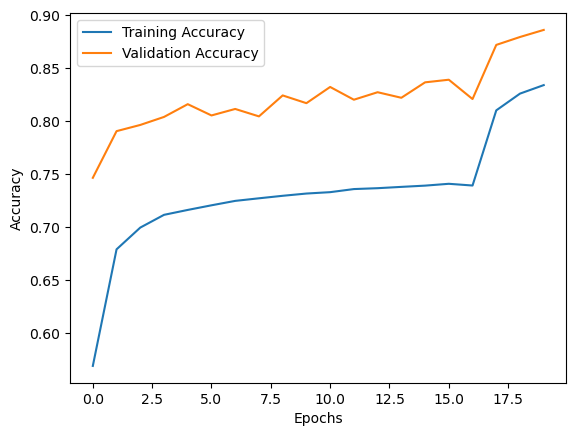

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [156]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [24]:
# Função para extrair embeddings dos textos
def get_bert_embeddings(texts, tokenizer, bert_model, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding=True, max_length=128).to(device)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].detach().cpu().numpy()
        embeddings.append(batch_embeddings)
        del inputs, outputs
        torch.cuda.empty_cache()
    return np.vstack(embeddings)

def preprocess_input(df, categorical_features, numerical_features, text_columns, tokenizer, bert_model, scaler):
    # Remover NaN em 'codigo_solicitado'
    df.fillna('', inplace=True)
    df.drop_duplicates(inplace=True)

    # Processamento dos textos com BERT
    # Aplica a função nos campos textuais em batches
    text_embeddings = []
    for column in text_columns:
        embeddings = get_bert_embeddings(df[column].tolist(), tokenizer, bert_model, batch_size=32)
        text_embeddings.append(embeddings)
    
    # Concatenar os embeddings textuais
    all_text_embeddings = np.hstack(text_embeddings)
    # Verificação das dimensões
    if df[numerical_features].shape[0] == all_text_embeddings.shape[0]:
        X_final = np.hstack([df[numerical_features], all_text_embeddings])
    else:
        raise ValueError("Dimensões incompatíveis entre X_normalized e text embeddings.")
    
    # Normalização dos dados numéricos
    X_final = scaler.transform(X_final)
   
    return X_final

def predict(df, model, categorical_features, numerical_features, text_columns, tokenizer, bert_model, scaler, encoder, code_to_description, top_k=5):
    X_processed = preprocess_input(df, categorical_features, numerical_features, text_columns, tokenizer, bert_model, scaler)
    predictions = model.predict(X_processed)
    top_k_indices = np.argsort(predictions, axis=1)[:, -top_k:][:, ::-1]  # Pega os top_k índices, ordenados por probabilidade
    top_k_labels = [encoder.inverse_transform(indices) for indices in top_k_indices]
    top_k_probabilities = np.sort(predictions, axis=1)[:, -top_k:][:, ::-1]  # Pega as top_k probabilidades, ordenadas
    top_k_descriptions = [[code_to_description[label] for label in labels] for labels in top_k_labels]
    return top_k_labels, top_k_probabilities, top_k_descriptions

In [158]:
# Carregando o modelo treinado e outros componentes necessários
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Carregar scaler e encoder treinados
scaler = joblib.load('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\scaler15.pkl')
encoder = joblib.load('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder15.pkl')

# Carregar o CSV com o mapeamento de 'codigo_solicitado' para suas descrições
csv_path = 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\amostra\\cod_solic3.csv'
code_df = pd.read_csv(csv_path)

# Converter o DataFrame em um dicionário
code_to_description = dict(zip(code_df['codigo_solicitado'], code_df['cod_solic_desc']))

# Definindo as colunas numéricas e categóricas conforme a sua descrição
numerical_features = ['abertura_id','modelo']
categorical_features = ['conserto', 'encerrado_bi', 'cod_solucao', 'grupo_posic', 'posicao_cod_inter', 'posic_descricao', 'material', 'tipo_equipamento', 'cod_aplic', 'cod_aplic_desc', 'nf', 'defeitos_reclamado_cod_aux', 'codigo_solucao', 'serial_ant', 'serial_nov', 'serie', 'numero_serie', 'situacao', 'tipo', 'enc', 'encdesc']
text_columns = ['problema', 'tipo_equipamento']

# Preparar o dataframe de input
df_input = df.sample(1)

colunas_desejadas = ['abertura_id','codigo_solicitado','modelo', 'problema', 'tipo_equipamento']
df_input = df_input[colunas_desejadas]
df_input1 = df_input
df_input = df_input.drop(columns=['codigo_solicitado'])

# Carregar o modelo
model1 = load_model('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\model15.h5')

# Fazer a previsão
top_k_labels, top_k_probabilities, top_k_descriptions = predict(df_input, model1, categorical_features, numerical_features, text_columns, tokenizer, bert_model, scaler, encoder, code_to_description, top_k=5)

# Exibir as previsões
for i, (labels, probabilities, descriptions) in enumerate(zip(top_k_labels, top_k_probabilities, top_k_descriptions)):
    print(f"Input {i+1}:")
    for label, probability, description in zip(labels, probabilities, descriptions):
        print(f"  {label} ({description}): {probability:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Input 1:
  11124973 (SSD 256GB SATAIII SU800FA2 ADATA): 0.6314
  11125113 (PROC CORE I5 7400 SR32W TRAY DSK INTEL): 0.2883
  11123358 (SSD 256GB SATAIII SU800BR1 ADATA): 0.0543
  11126577 (PLM POS-PIB150DR DDR4 ECOFP): 0.0074
  11133226 (HDD 500GB 2,5` SATAIII SEAGT ST500LM034): 0.0056


In [159]:
df_input1

,abertura_id,codigo_solicitado,modelo,problema,tipo_equipamento
2782,7428571,11128693,58697,"COL?GIO ESTADUAL CEEBJA PINHAO\nMUNIC?PIO DE PINHAO\nENDERE?O: R. XV DE NOVEMBRO, S/N - NOSSA SENHORA APAR, PINHAO - PR, 85170000\nTELEFONE:((42) 3677-2161\nINEP: 41145879\nHOR?RIO: 08:00 AS 12:00 13:00 ?S 17:00 H\nCONTATO: CLAUDIO DEFEITO: NAO LEVANTA O HD",DESKTOP


In [160]:
valor = df_input1['abertura_id']
resultado =   df1.query('abertura_id == @valor')
resultado['cod_solic_desc']


2782    SSD 256GB SATA CV6-CQ256 LITEO
Name: cod_solic_desc, dtype: object

In [63]:
# Carregando o modelo treinado e outros componentes necessários
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Carregar scaler e encoder treinados
scaler = joblib.load('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\scaler6.pkl')
encoder = joblib.load('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\label_encoder6.pkl')

# Carregar o CSV com o mapeamento de 'codigo_solicitado' para suas descrições
csv_path = 'C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\amostra\\cod_solic.csv'
code_df = pd.read_csv(csv_path)

# Converter o DataFrame em um dicionário
code_to_description = dict(zip(code_df['codigo_solicitado'], code_df['cod_solic_desc']))

# Definindo as colunas numéricas e categóricas conforme a sua descrição
numerical_features = ['abertura_id','modelo']
categorical_features = ['conserto', 'encerrado_bi', 'cod_solucao', 'grupo_posic', 'posicao_cod_inter', 'posic_descricao', 'material', 'tipo_equipamento', 'cod_aplic', 'cod_aplic_desc', 'nf', 'defeitos_reclamado_cod_aux', 'codigo_solucao', 'serial_ant', 'serial_nov', 'serie', 'numero_serie', 'situacao', 'tipo', 'enc', 'encdesc']
text_columns = ['problema', 'tipo_equipamento']

# Preparar o dataframe de input
df_input = df.sample(1)

colunas_desejadas = ['abertura_id','codigo_solicitado','modelo', 'problema', 'tipo_equipamento']
df_input = df_input[colunas_desejadas]
df_input1 = df_input
df_input = df_input.drop(columns=['codigo_solicitado'])

# Carregar o modelo
model1 = load_model('C:\\Users\\daniel.silva\\Documents\\cits\\desafio I\\resultado1\\model6.h5')

# Fazer a previsão
top_k_labels, top_k_probabilities, top_k_descriptions = predict(df_input, model1, categorical_features, numerical_features, text_columns, tokenizer, bert_model, scaler, encoder, code_to_description, top_k=5)

# Exibir as previsões
for i, (labels, probabilities, descriptions) in enumerate(zip(top_k_labels, top_k_probabilities, top_k_descriptions)):
    print(f"Input {i+1}:")
    for label, probability, description in zip(labels, probabilities, descriptions):
        print(f"  {label} ({description}): {probability:.4f}")

C:\Users\daniel.silva\AppData\Local\Temp\ipykernel_22680\2872069118.py:13: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  code_df = pd.read_csv(csv_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Input 1:
  11150027 (LCD 12 GLARE SL116PP40Y1008 V116N S LOGO): 0.0882
  11161415 (PLM V142R-2 2GB 32GB Z8330 DDR3 JABIL JA): 0.0709
  11134313 (BATER 2C LI-PO 10000MAH VKING MONT): 0.0629
  11145471 (TAMPA COVER D DARK GRAY N14ZP6): 0.0510
  11110030 (ADAPT AC/DC ARSENAL S29A00P 40W 2P SALCO): 0.0503


In [64]:
df_input1 # dado original - peça que foi solicitada - codigo_solicitado original

,abertura_id,codigo_solicitado,modelo,problema,tipo_equipamento
3206,7443023,11161415,78501,FUNCIONAL,NOTEBOOK
